#Assignment 06: Computer Vision Applications

This Week's assignment is to train semantic segmentation models on the `Satellite buildings` images dataset.

Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 06: Computer Vision Applications - Muntadher Alkaabi).


**Submission Deadline: Thursday, 2/24/2022 at 3:00 PM**

**Requirements:**

1. Import all necessary libraries for the semantic segmentation project.
2. Download the dataset (the link is provided below).
3. Create a function that convert the images path into dataframe(make sure that the images and their masks are matching). 
4. Make sure to convert the mask into one hot vector.
5. Split the dataset into train and test dateset (test dataset should be 10% of the total dataset).
6. Create data pipeline with data augmentation.
    1. Read images using tensorflow.
    2. Make sure the pixels values are scaled between (`0-1`).
    3. Resize the images to (224,224).
    4. Apply multiple image augmentation on the data (make sure that the image augmentation is reflected on its mask).
    5. Make sure the augmentation image pixels are scaled between (`0-1`). 
7. Plot the images.
8. Build Autoencoder model.

9. Build UNet model.<br>
**Note:** use sub-class to create the model.


10. Plot the model results.


**Note:** To get the best performance from the model, manually tune the hyperparameters of each model. 

Find relevant links below:<br>

[Assigment Colab File](https://colab.research.google.com/drive/1eoR4qjszwxieYTqPu2da8-kpOKtb0hod?usp=sharing)<br>
[Dataset](https://www.kaggle.com/hyyyrwang/buildings-dataset)

[Submission Form](https://docs.google.com/forms/d/e/1FAIpQLSfzW6FI2urJ-zlAV8sS9brv4cbpe6npmQg5KuD83nifeUgwHw/viewform?usp=pp_url)<br>
[How to use kaggle with colab](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)<br>


Good luck and feel free to ask any questions in the or on the Questions channel.

# 1- Import all necessary libraries for the semantic segmentation project

In [ ]:
# write your code below

import tensorflow as tf
import numpy as np
import pandas as pd
import glob
from sklearn import model_selection
import matplotlib.pyplot as plt
import tqdm
import os 



# 2- Download the dataset

In [ ]:
# download the required dataset from kaggle 

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# write your code below

! kaggle datasets download -d hyyyrwang/buildings-dataset

 99% 833M/842M [00:14<00:00, 87.8MB/s]
100% 842M/842M [00:14<00:00, 59.3MB/s]


In [ ]:
! unzip "/content/buildings-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: src/T1886.png           
  inflating: src/T1887.png           
  inflating: src/T1888.png           
  inflating: src/T1889.png           
  inflating: src/T189.png            
  inflating: src/T1890.png           
  inflating: src/T1891.png           
  inflating: src/T1892.png           
  inflating: src/T1893.png           
  inflating: src/T1894.png           
  inflating: src/T1895.png           
  inflating: src/T1896.png           
  inflating: src/T1897.png           
  inflating: src/T1898.png           
  inflating: src/T1899.png           
  inflating: src/T19.png             
  inflating: src/T190.png            
  inflating: src/T1900.png           
  inflating: src/T1901.png           
  inflating: src/T1902.png           
  inflating: src/T1903.png           
  inflating: src/T1904.png           
  inflating: src/T1905.png           
  inflating: src/T1906.png           
  inflating: src/T1907.png           

# 3- Create a function that converts the images paths into a dataframe(make sure that the images and their masks are matching)

In [ ]:

def read_file (path_file):
  image_list=sorted(glob.glob(f'{path_file}/*.png'))
  return image_list


scr_image = read_file('/content/src')
label_image = read_file('/content/label')


def create_dataset(scr_img,mask_img):
  data=pd.DataFrame({'images':scr_img,'masks':mask_img})
  return data 


dataset = create_dataset(scr_image,label_image)
type(dataset)

pandas.core.frame.DataFrame

# 4- Convert the mask into one hot vector

In [ ]:
NUM_CLASSES = 2


def read_image(x,y):
    
    x=tf.io.read_file(x)
    x=tf.image.decode_png(x,channels=3)
    x = tf.image.convert_image_dtype(x, tf.float32)
    x = tf.image.resize(x, [224, 224])
    x=tf.clip_by_value(x,clip_value_min=0,clip_value_max=1)


    y=tf.io.read_file(y)
    y=tf.image.decode_png(y,channels=1)
    y = tf.image.resize(y, [224, 224],
                        method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    y=tf.clip_by_value(y,clip_value_min=0,clip_value_max=1)
    y=tf.reshape(y,(224,224))
    y=tf.one_hot(y,depth=NUM_CLASSES)

    return x,y


def data_aug(x,y):
  
    
    seed=np.random.randint(low=0,high=100,size=1)
    
    tf.compat.v1.set_random_seed(seed)
    x = tf.image.random_flip_up_down(x,seed=seed[0])
    x = tf.image.random_flip_left_right(x,seed=seed[0])
    x = tf.image.random_brightness(x, max_delta=32.0 / 255.0)
    x = tf.image.random_saturation(x, lower=0.5, upper=1.5)
    x = tf.clip_by_value(x, 0.0, 1.0)
    
    
    y=tf.argmax(y,axis=-1)
    y=tf.reshape(y,shape=(224,224,1))
    y=tf.image.random_flip_up_down(y,seed=seed[0])
    y=tf.image.random_flip_left_right(y,seed=seed[0])
    y=tf.reshape(y,shape=(224,224))
    y=tf.one_hot(y,depth=NUM_CLASSES)



    return x,y



# 5- Split the dataset into train and test dateset (test dataset should be 10% of the total dataset)

In [ ]:
# write your code below
(train,test)= model_selection.train_test_split(dataset,test_size=0.1,random_state=42)


In [ ]:
test

,images,masks
1870,/content/src/T2627.png,/content/label/T2627.png
5922,/content/src/W901.png,/content/label/W901.png
1328,/content/src/T2139.png,/content/label/T2139.png
5082,/content/src/W1468.png,/content/label/W1468.png
3411,/content/src/T4013.png,/content/label/T4013.png
...,...,...
1022,/content/src/T1864.png,/content/label/T1864.png
3800,/content/src/T4364.png,/content/label/T4364.png
3932,/content/src/T4483.png,/content/label/T4483.png
4560,/content/src/W0.png,/content/label/W0.png


# 6- Create data pipeline with data augmentation

Notes:<br>
1. Read images using tensorflow.
2. Make sure the pixels values are scaled between (0-1).
3. Resize the images to (224,224).
4. Apply multiple image augmentation on the data(make sure that the image augmentation is reflected on its mask).
5. Make sure the augmentation image pixels are scaled between (0-1).

In [ ]:
# write your code below
def dataset_creater(x,y,training=False):
  data=tf.data.Dataset.from_tensor_slices((x,y))

  data=data.shuffle(1028,reshuffle_each_iteration=True)

  data=data.map(read_image,num_parallel_calls=tf.data.AUTOTUNE)


  if training:
    data=data.map(data_aug,num_parallel_calls=tf.data.AUTOTUNE)

  data=data.batch(32)
  data=data.prefetch(tf.data.AUTOTUNE)

  return data

train_dataset=dataset_creater(train.images,train.masks,training=True)
test_dataset=dataset_creater(test.images,test.masks)


pass 1 error
pass 12 error
pass 13 error
pass 1 error
pass 12 error
pass 13 error


# 7- Plot the images

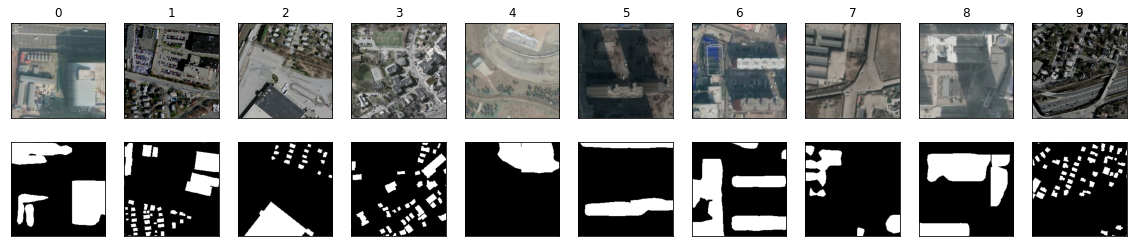

In [ ]:
# write your code below
n = 10
plt.figure(figsize=(20, 4))

for x,y in train_dataset.take(1):



    for i in range(n):
        ax=plt.subplot(2, n, i + 1)
        plt.title(f"{i}")
        plt.imshow(tf.squeeze(x[i]))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    

    
        bx=plt.subplot(2, n, n+i + 1)

    
        
        plt.imshow(tf.squeeze(tf.argmax(y[i],-1)))
        plt.gray()
        bx.get_xaxis().set_visible(False)
        bx.get_yaxis().set_visible(False)

        


plt.show()


# 8- Build Autoencoder model

### Encoder

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self):
        super(Encoder,self).__init__()
        
        self.conv1,self.Bn1=self.block_encoder(16)

        self.conv2,self.Bn2=self.block_encoder(32,(2,2))
       
        self.conv3,self.Bn3=self.block_encoder(64)
        
        self.conv4,self.Bn4=self.block_encoder(128,(2,2))
         
        self.conv5,self.Bn5=self.block_encoder(256)
        



    def block_encoder(self,num_filters,strides_n=(1,1)):
      Conv=tf.keras.layers.Conv2D(filters=num_filters,kernel_size=(3,3),
                                    strides=strides_n,padding='same',use_bias=False)
      BN=tf.keras.layers.BatchNormalization()

      return Conv,BN
          
       
     
      

    def call(self,x):
        #block 1
        x=self.conv1(x)
        x=self.Bn1(x)
        x=tf.nn.leaky_relu(x)
        #block 2
        x=self.conv2(x)
        x=self.Bn2(x)
        x=tf.nn.leaky_relu(x)
        #block 3
        x=self.conv3(x)
        x=self.Bn3(x)
        x=tf.nn.leaky_relu(x)
        #block 4
        x=self.conv4(x)
        x=self.Bn4(x)
        x=tf.nn.leaky_relu(x)
        #block 5
        x=self.conv5(x)
        x=self.Bn5(x)
        x=tf.nn.leaky_relu(x)


        return x 

    def build_model(self,dim):
        x=tf.keras.layers.Input(shape=dim)
        return tf.keras.Model(inputs=[x],outputs=[self.call(x)])

encoder=Encoder()
encoder.build_model((224,224,3)).summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      432       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 16)     64        
 ormalization)                                                   
                                                                 
 tf.nn.leaky_relu (TFOpLambd  (None, 224, 224, 16)     0         
 a)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4608      
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 32)     128   

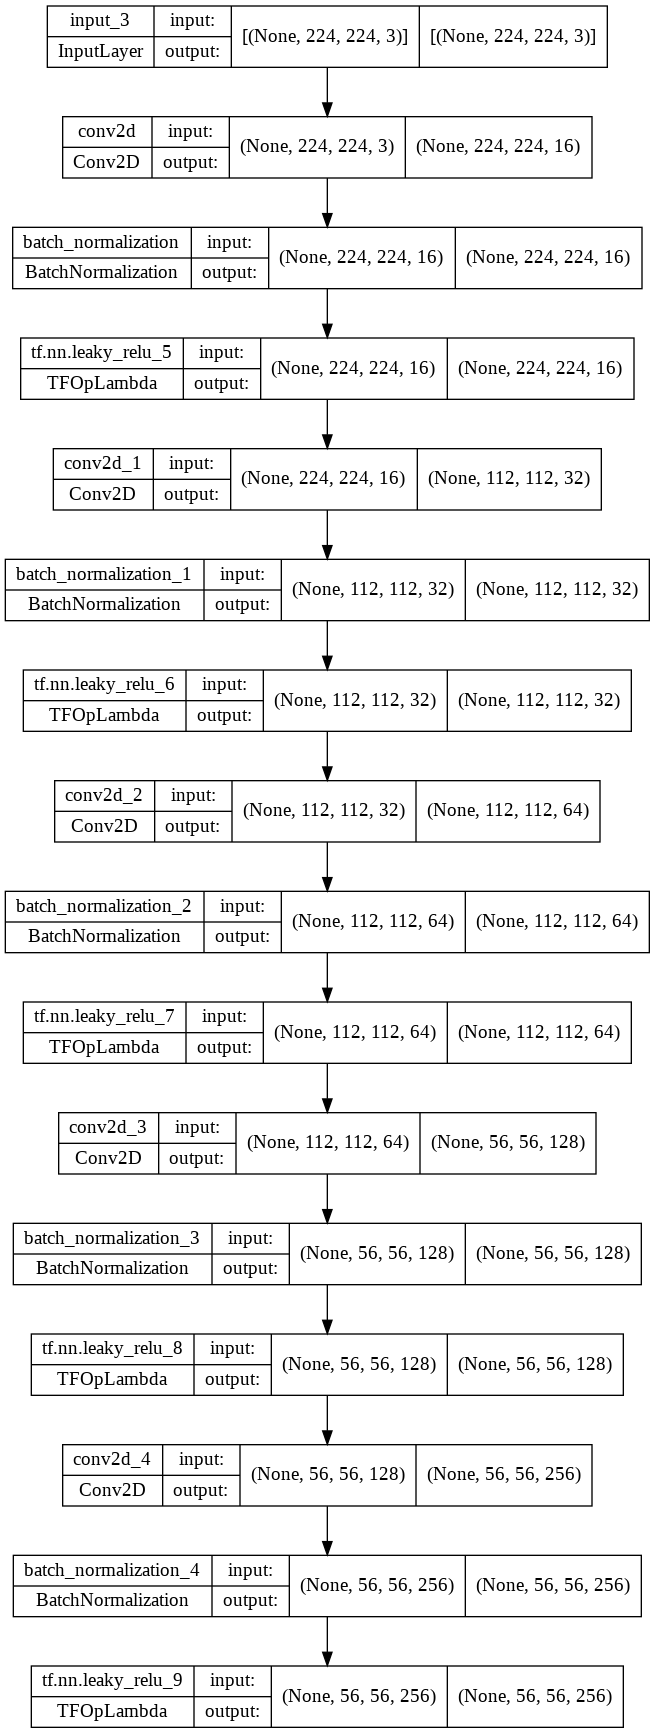

In [ ]:
tf.keras.utils.plot_model(encoder.build_model((224,224,3)),show_shapes=True)

### Decoder

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self):
        super(Decoder,self).__init__()
        self.conv1,self.Bn1=self.block_decoder(256)
        self.conv2,self.Bn2=self.block_decoder(128,(2,2))
        self.conv3,self.Bn3=self.block_decoder(64)
        self.conv4,self.Bn4=self.block_decoder(32,(2,2))
        self.conv5,self.Bn5=self.block_decoder(16)
        self.Out,_=self.block_decoder(2)



    def block_decoder(self,num_filters,strides_n=(1,1)):
      Conv=tf.keras.layers.Conv2DTranspose(filters=num_filters,kernel_size=(3,3),
                                                  strides=strides_n,padding='same',use_bias=False)
      BN=tf.keras.layers.BatchNormalization()

      return Conv,BN
          
        


    def call(self,x):
        #block 1
        x=self.conv1(x)
        x=self.Bn1(x)
        x=tf.nn.leaky_relu(x)
        #block 2

        x=self.conv2(x)
        x=self.Bn2(x)
        x=tf.nn.leaky_relu(x)
        #block 3

        x=self.conv3(x)
        x=self.Bn3(x)
        x=tf.nn.leaky_relu(x)
        #block 4

        x=self.conv4(x)
        x=self.Bn4(x)
        x=tf.nn.leaky_relu(x)
        #block 5
        x=self.conv5(x)
        x=self.Bn5(x)
        x=tf.nn.leaky_relu(x)
        #block 6
        #notice we're using sigmoid to make sure the output value of the last Conv2DTranspose will be between 0,1
        

        output=self.Out(x)
        output=tf.nn.softmax(output)

        return output

    def build_model(self,dim):
        x=tf.keras.layers.Input(shape=dim)
        return tf.keras.Model(inputs=[x],outputs=[self.call(x)])

decoder=Decoder()
decoder.build_model((56,56,256)).summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 56, 56, 256)]     0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 56, 56, 256)      589824    
 nspose)                                                         
                                                                 
 batch_normalization_5 (Batc  (None, 56, 56, 256)      1024      
 hNormalization)                                                 
                                                                 
 tf.nn.leaky_relu_10 (TFOpLa  (None, 56, 56, 256)      0         
 mbda)                                                           
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 112, 112, 128)    294912    
 ranspose)                                                 

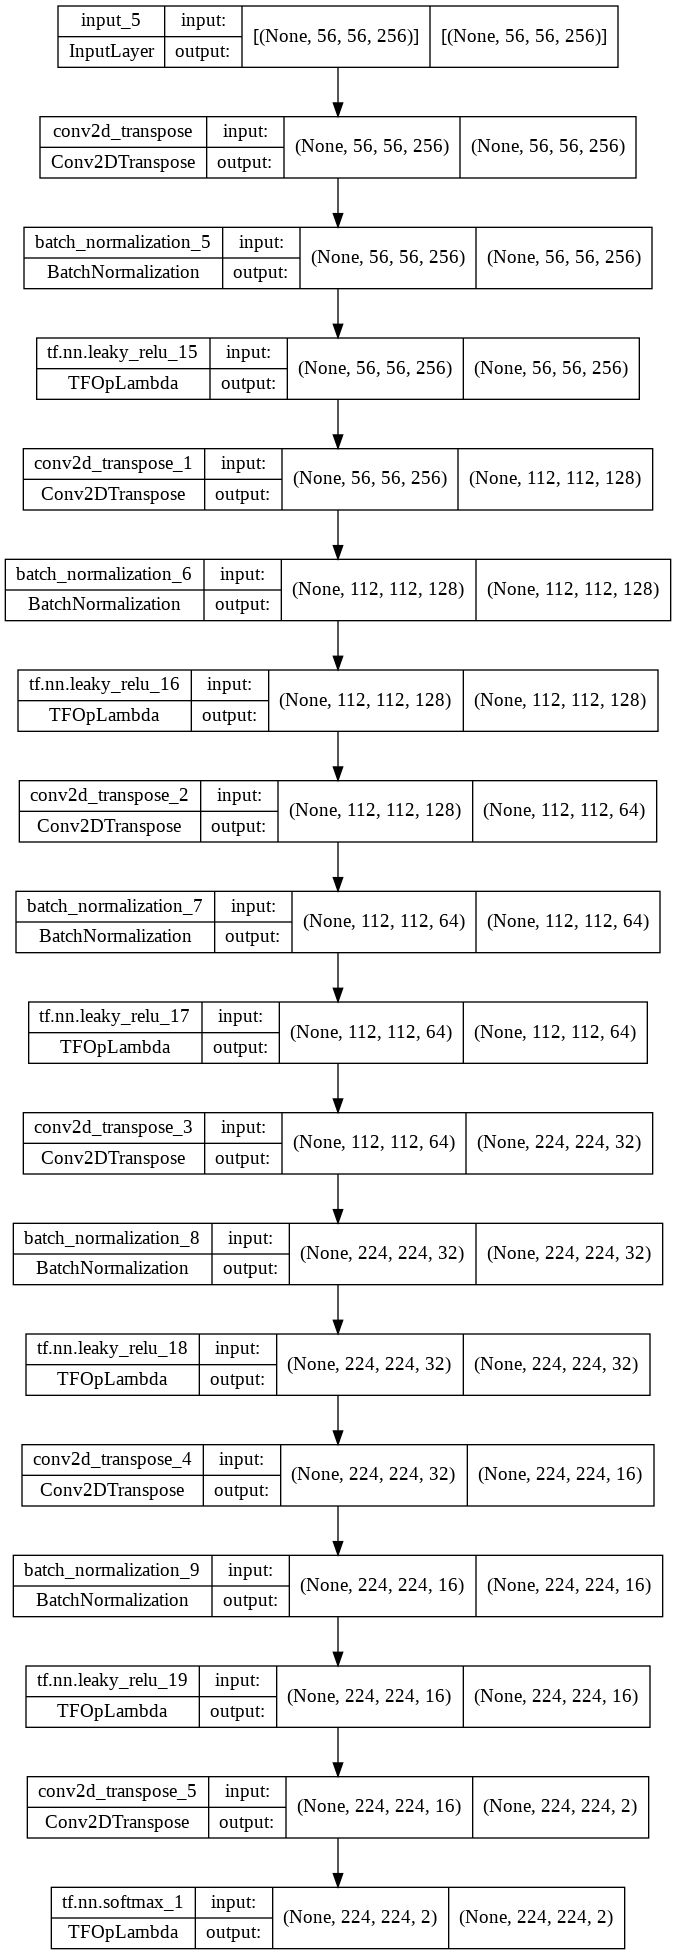

In [ ]:
tf.keras.utils.plot_model(decoder.build_model((56,56,256)),show_shapes=True)

### Model

In [ ]:
# write your code below
class Autoencoder(tf.keras.Model):
    def __init__(self):
        super(Autoencoder,self).__init__()
        #initialize the encoder 
        self.encoder=Encoder()
        #initialize the decoder 
        self.decoder=Decoder()
    def call(self,x):
        #input the noisy image to the encoder 
        x=self.encoder(x)
        #input the ouput of the encoder to the decoder
        x=self.decoder(x)

        #return the ouput of the decoder 
        #the ouput of the decoder will be denoising image 

        return x

autoencoder=Autoencoder()
autoencoder.build(input_shape=(None,224,224,3))
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Encoder)         multiple                  394096    
                                                                 
 decoder_1 (Decoder)         multiple                  983776    
                                                                 
Total params: 1,377,872
Trainable params: 1,375,888
Non-trainable params: 1,984
_________________________________________________________________


In [ ]:

autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
autoencoder.fit(train_dataset,
                epochs=10,
                validation_data=test_dataset)


Epoch 1/10
170/170 [==============================] - 63s 359ms/step - loss: 0.3210 - acc: 0.8652 - val_loss: 0.3526 - val_acc: 0.8557
Epoch 2/10
170/170 [==============================] - 61s 359ms/step - loss: 0.3158 - acc: 0.8676 - val_loss: 0.3580 - val_acc: 0.8440
Epoch 3/10
170/170 [==============================] - 62s 363ms/step - loss: 0.3080 - acc: 0.8704 - val_loss: 0.3155 - val_acc: 0.8662
Epoch 4/10
170/170 [==============================] - 63s 368ms/step - loss: 0.3019 - acc: 0.8732 - val_loss: 0.2833 - val_acc: 0.8810
Epoch 5/10
170/170 [==============================] - 62s 364ms/step - loss: 0.3011 - acc: 0.8745 - val_loss: 0.3223 - val_acc: 0.8635
Epoch 6/10
170/170 [==============================] - 63s 370ms/step - loss: 0.2961 - acc: 0.8759 - val_loss: 0.2997 - val_acc: 0.8696
Epoch 7/10
170/170 [==============================] - 62s 366ms/step - loss: 0.2874 - acc: 0.8791 - val_loss: 0.2822 - val_acc: 0.8792
Epoch 8/10
170/170 [==============================] - 6

# 8- Plot the autoencoder model results

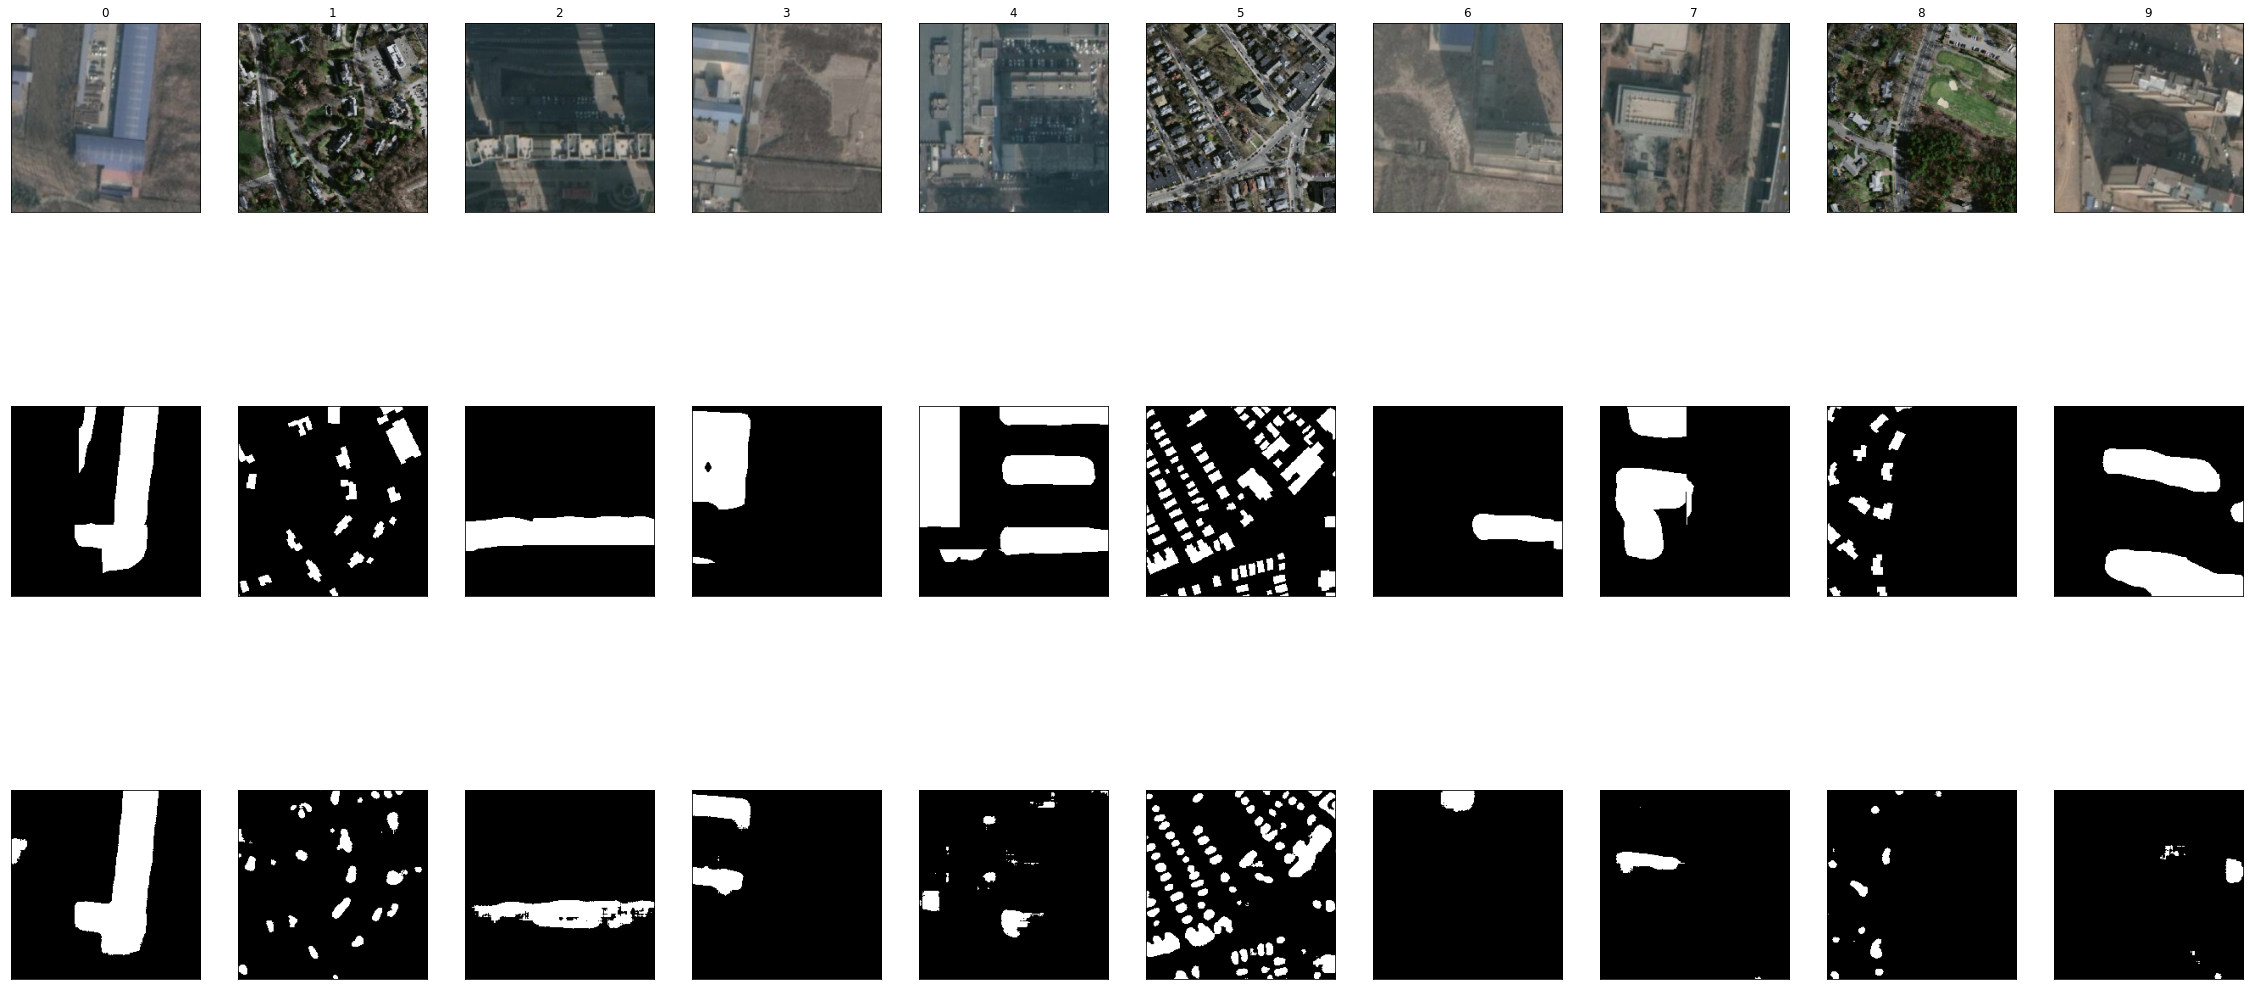

In [ ]:
# plot the images
for x, y in test_dataset.take(1):
    pred=autoencoder(x,training=False)
    pred=tf.argmax(pred,axis=-1)
    n = 10
    plt.figure(figsize=(40, 20))
    for i in range(n):
        ax=plt.subplot(3, n, i + 1)
        plt.title(f"{i}")
        plt.imshow(tf.squeeze(x[i]))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        bx=plt.subplot(3, n, n+i + 1)
        plt.imshow(tf.squeeze(tf.argmax(y[i],axis=-1)))
        plt.gray()
        bx.get_xaxis().set_visible(False)
        bx.get_yaxis().set_visible(False)
        cx=plt.subplot(3, n, n+i+n + 1)
        plt.imshow(tf.squeeze(pred[i]))
        plt.gray()
        cx.get_xaxis().set_visible(False)
        cx.get_yaxis().set_visible(False)
plt.show()

# 9- Build UNet model

Note: use sub-class to create the model.

### Convolution Block

In [ ]:
class ConvBlock(tf.keras.layers.Layer):
    
    def __init__(self,filters):
        super(ConvBlock,self).__init__()
        # add conv2d to the block with BN layer
        self.Conv_1=tf.keras.layers.Conv2D(filters=filters,kernel_size=(3,3),padding='same',use_bias=False)
        self.BN_1=tf.keras.layers.BatchNormalization()
        # add conv2d to the block with BN layer
        self.Conv_2=tf.keras.layers.Conv2D(filters=filters,kernel_size=(3,3),padding='same',use_bias=False)
        self.BN_2=tf.keras.layers.BatchNormalization()
    def call(self,x):
        x=self.Conv_1(x)
        x=self.BN_1(x)
        x=tf.nn.leaky_relu(x)

        x=self.Conv_2(x)
        x=self.BN_2(x)
        x=tf.nn.leaky_relu(x)

        return x

### Encoder UNet

In [ ]:
class EncoderBlock(tf.keras.layers.Layer):
    def __init__(self,filters):
        super(EncoderBlock,self).__init__()
       
        self.Conv_block=ConvBlock(filters)
  
        self.Max_pool=tf.keras.layers.MaxPooling2D()

    def call(self,x):
        x=self.Conv_block(x)
        p=self.Max_pool(x)

        return x,p

In [ ]:
class DecoderBlock(tf.keras.layers.Layer):
    def __init__(self,filters):
        super(DecoderBlock,self).__init__()
        
        self.ConvTranspose=tf.keras.layers.Conv2DTranspose(filters,kernel_size=(2,2),strides=(2,2),padding='same')
        self.Conv_block=ConvBlock(filters)

    def call(self,input, skip_features):
      
        x=self.ConvTranspose(input)
        
        x=tf.keras.layers.concatenate([x,skip_features])
        x=self.Conv_block(x)
        return x

In [ ]:
# write your code below
class UNet_Model(tf.keras.Model):
  def __init__(self,n_classes=NUM_CLASSES):
    super(UNet_Model,self).__init__()
   
    self.encoder_block_1=EncoderBlock(32)
    self.encoder_block_2=EncoderBlock(64)
    self.encoder_block_3=EncoderBlock(128)
    self.encoder_block_4=EncoderBlock(256)
    self.encoder_block_5=EncoderBlock(512)

    self.conv_block_6=ConvBlock(1028)

    self.decoder_block_7=DecoderBlock(512)
    self.decoder_block_8=DecoderBlock(256)
    self.decoder_block_9=DecoderBlock(128)
    self.decoder_block_10=DecoderBlock(64)
    self.decoder_block_11=DecoderBlock(32)


    self.out = tf.keras.layers.Conv2D(n_classes,kernel_size=(1,1))




  def call(self,x):
       
      s1,x=self.encoder_block_1(x)
      s2,x=self.encoder_block_2(x)
      s3,x=self.encoder_block_3(x)
      s4,x=self.encoder_block_4(x)
      s5,x=self.encoder_block_5(x)

      x=self.conv_block_6(x)
      x=self.decoder_block_7(x,s5)
      x=self.decoder_block_8(x,s4)
      x=self.decoder_block_9(x,s3)
      x=self.decoder_block_10(x,s2)
      x=self.decoder_block_11(x,s1)
      x=self.out(x)
      x=tf.nn.softmax(x)





      return x
  def build_model(self,dim=(256,256,3)):
    x=tf.keras.layers.Input(dim)
    return tf.keras.Model(inputs=[x],outputs=[self.call(x)])

uNet_Model=UNet_Model()
uNet_Model.build_model().summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 encoder_block_31 (EncoderBlock  ((None, 256, 256, 3  10336      ['input_8[0][0]']                
 )                              2),                                                               
                                 (None, 128, 128, 3                                               
                                2))                                                               
                                                                                            

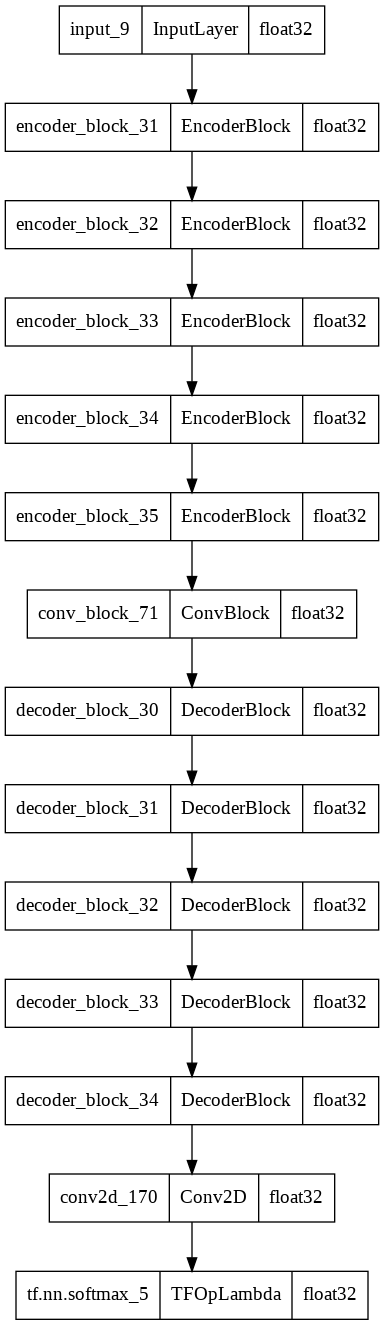

In [ ]:
tf.keras.utils.plot_model(uNet_Model.build_model(),show_dtype=True)

In [ ]:
uNet_Model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
uNet_Model.fit(train_dataset,
                epochs=10,
                validation_data=test_dataset)

Epoch 1/10
170/170 [==============================] - 122s 655ms/step - loss: 0.3876 - acc: 0.8366 - val_loss: 0.8150 - val_acc: 0.8019
Epoch 2/10
170/170 [==============================] - 101s 591ms/step - loss: 0.3445 - acc: 0.8564 - val_loss: 0.4712 - val_acc: 0.8436
Epoch 3/10
170/170 [==============================] - 100s 584ms/step - loss: 0.3262 - acc: 0.8646 - val_loss: 0.3369 - val_acc: 0.8658
Epoch 4/10
170/170 [==============================] - 102s 600ms/step - loss: 0.3133 - acc: 0.8703 - val_loss: 0.3697 - val_acc: 0.8437
Epoch 5/10
170/170 [==============================] - 102s 601ms/step - loss: 0.3052 - acc: 0.8732 - val_loss: 0.4964 - val_acc: 0.7417
Epoch 6/10
170/170 [==============================] - 103s 602ms/step - loss: 0.2861 - acc: 0.8816 - val_loss: 0.3211 - val_acc: 0.8609
Epoch 7/10
170/170 [==============================] - 103s 602ms/step - loss: 0.2804 - acc: 0.8834 - val_loss: 0.4124 - val_acc: 0.8560
Epoch 8/10
170/170 [============================

# 10- Plot the model results

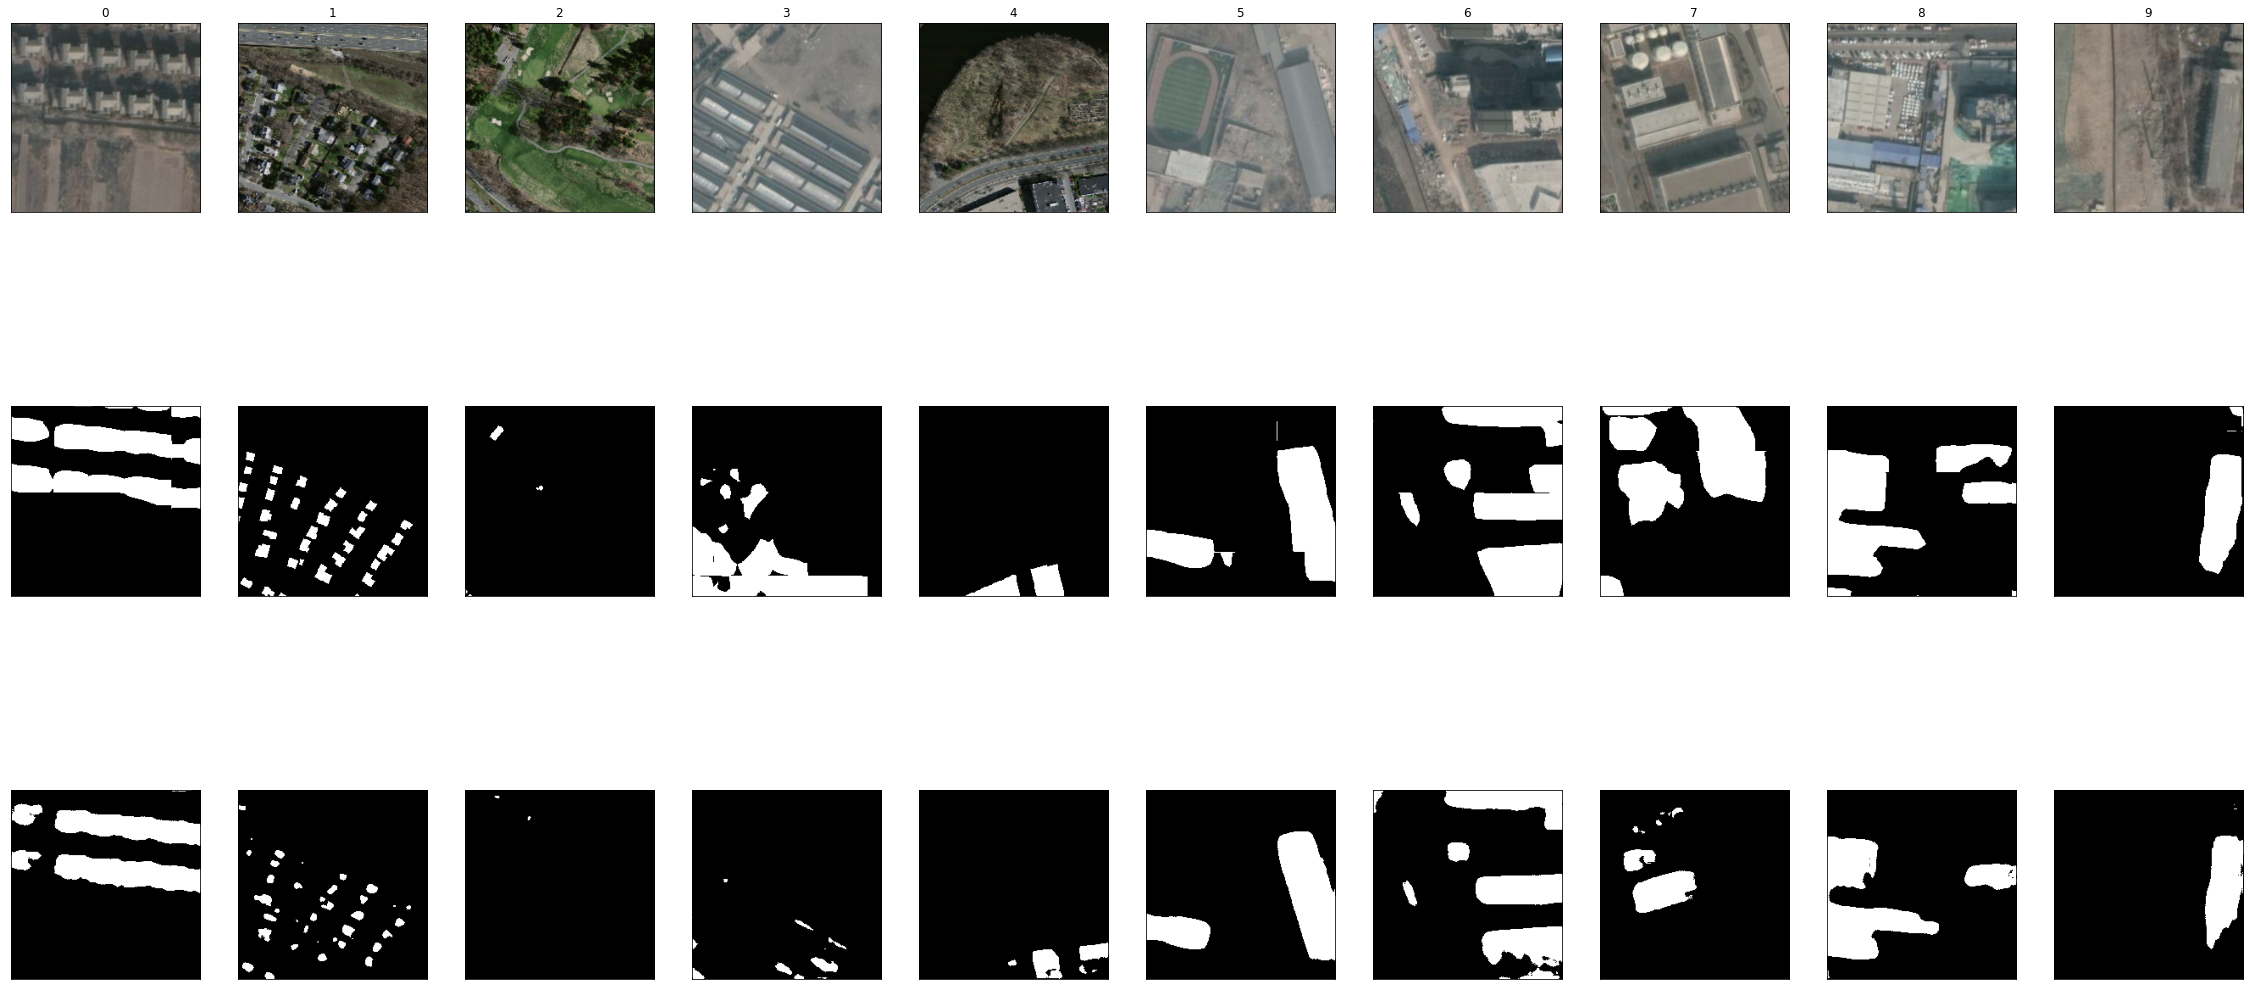

In [ ]:
# write your code below
# plot the images
for x, y in test_dataset.take(1):
    pred=uNet_Model(x,training=False)
    pred=tf.argmax(pred,axis=-1)
    n = 10
    plt.figure(figsize=(40, 20))
    for i in range(n):
        ax=plt.subplot(3, n, i + 1)
        plt.title(f"{i}")
        plt.imshow(tf.squeeze(x[i]))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        bx=plt.subplot(3, n, n+i + 1)
        plt.imshow(tf.squeeze(tf.argmax(y[i],axis=-1)))
        plt.gray()
        bx.get_xaxis().set_visible(False)
        bx.get_yaxis().set_visible(False)
        cx=plt.subplot(3, n, n+i+n + 1)
        plt.imshow(tf.squeeze(pred[i]))
        plt.gray()
        cx.get_xaxis().set_visible(False)
        cx.get_yaxis().set_visible(False)
plt.show()
